<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0623_%ED%9A%8C%EA%B7%80%EC%8B%A4%EC%8A%B5_%EC%BA%90%EA%B8%80_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path='/content/drive/MyDrive/python_basic/data/house_train.csv'

In [4]:
df=pd.read_csv(path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

In [16]:
ns=df.isnull().sum()
ns[ns>0].sort_values(ascending=False)
ncs=ns[ns>100].index
df=df.drop(ncs,axis=1)

In [17]:
ns=df.isnull().sum()
ns[ns>0]

Series([], dtype: int64)

In [20]:
df=df[df['MasVnrArea'].notnull()]

In [25]:
df=df[df['GarageYrBlt'].notnull()]

In [29]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
ncs=ns[ns>0].index
for column in ncs:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])

In [ ]:
df.info()

In [32]:
df[ncs].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MasVnrType    1371 non-null   int64
 1   MasVnrArea    1371 non-null   int64
 2   BsmtQual      1371 non-null   int64
 3   BsmtCond      1371 non-null   int64
 4   BsmtExposure  1371 non-null   int64
 5   BsmtFinType1  1371 non-null   int64
 6   BsmtFinType2  1371 non-null   int64
 7   Electrical    1371 non-null   int64
 8   GarageType    1371 non-null   int64
 9   GarageYrBlt   1371 non-null   int64
 10  GarageFinish  1371 non-null   int64
 11  GarageQual    1371 non-null   int64
 12  GarageCond    1371 non-null   int64
dtypes: int64(13)
memory usage: 150.0 KB


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
dof=df[df.columns].dtypes==object
ocs=df.columns[dof]

In [54]:
for column in ocs:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])

In [56]:
data=df.drop('SalePrice',axis=1)
label=df['SalePrice']

In [57]:
ss=StandardScaler()
scaled_data=ss.fit_transform(data)

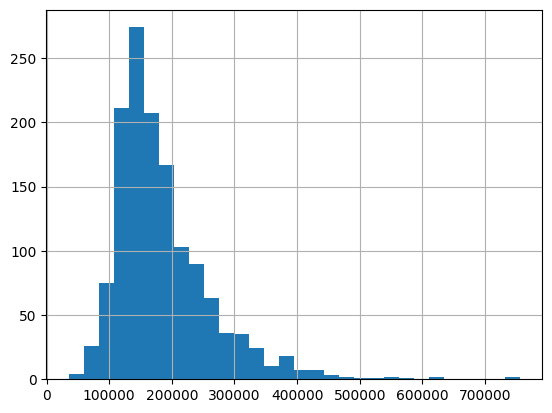

In [58]:
label.hist(bins=30)
plt.show()

In [94]:
label_log=np.log1p(label)

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def rmsle(y,pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  se = (log_y - log_pred)**2
  return np.sqrt(np.mean(se))
def rmse(y,pred):
  return np.sqrt(mean_squared_error(y,pred))
def evaluate_regr(y,pred):
  rv1 = rmsle(y,pred)
  rv2 = rmse(y,pred)
  rv3 = mean_absolute_error(y,pred)
  r2 = r2_score(y,pred)
  print(f'r2:{r2:.3f} RMSLE:{rv1:.3f} RMSE:{rv2:.3f} MAE:{rv3:.3f}')

In [96]:
darr=[]
marr=['data-label','sd-label','data-labellog','sd-labellog']
darr.append(train_test_split(data,label))
darr.append(train_test_split(scaled_data,label))
darr.append(train_test_split(data,label_log))
darr.append(train_test_split(scaled_data,label_log))

In [97]:
def model_test(model,x_train,x_test,y_train,y_test,flag=True):
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  evaluate_regr(y_test,pred)
  if flag:
    pred_exp = np.expm1(pred)
    pred_yt = np.expm1(y_test)
    evaluate_regr(pred_yt,pred_exp)

In [98]:
def model_tests(model):
  print("###",model.__class__.__name__)
  for i,(xtr,xte,ytr,yte) in enumerate(darr):
    print("\t",marr[i])
    model_test(model,xtr,xte,ytr,yte,i>=2)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
model=LinearRegression()
model_tests(model)

### LinearRegression
	 data-label
r2:0.592 RMSLE:0.160 RMSE:44351.714 MAE:19385.363
	 sd-label
r2:-2346450671877380611506176.000 RMSLE:0.158 RMSE:115127938636631760.000 MAE:6216324379367347.000
	 data-labellog
r2:0.892 RMSLE:0.010 RMSE:0.123 MAE:0.089
r2:0.910 RMSLE:0.123 RMSE:22883.044 MAE:16026.298
	 sd-labellog
r2:0.762 RMSLE:0.014 RMSE:0.190 MAE:0.094
r2:-0.997 RMSLE:0.190 RMSE:120960.830 MAE:22484.965


<ipython-input-95-ebd6af9afb04>:6: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
m1 = LinearRegression()
m2 = Ridge()
m3 = Lasso()
m4 = DecisionTreeRegressor()
m5 = RandomForestRegressor()
m6 = GradientBoostingRegressor()
m7 = XGBRegressor()
m8 = LGBMRegressor()
models = [m1,m2,m3,m4,m5,m6,m7,m8]
for model in models:
  model_tests(model)

In [ ]:
aps = [0, 0.001,0.01,0.1,1,2,5,10,100]
for a in aps:
  model = Ridge(alpha=a)
  print("!!!!!! alpha:",a)
  model_tests(model)

In [106]:
from sklearn.model_selection import GridSearchCV
params = {
    'num_leaves' :[5,10,30,100],
    'max_depth' :[3,5,10,15,-1],
    'min_child_samples':[10,20,100,1000]
}
model = LGBMRegressor(n_estimators=500)
gs = GridSearchCV(model,param_grid=params,cv=5)
model_tests(gs)

### GridSearchCV
	 data-label
r2:0.859 RMSLE:0.118 RMSE:26082.864 MAE:15148.914
	 sd-label
r2:0.891 RMSLE:0.128 RMSE:24810.986 MAE:16675.742
	 data-labellog
r2:0.902 RMSLE:0.009 RMSE:0.117 MAE:0.084
r2:0.915 RMSLE:0.117 RMSE:22251.715 MAE:15265.334
	 sd-labellog
r2:0.876 RMSLE:0.010 RMSE:0.137 MAE:0.094
r2:0.847 RMSLE:0.137 RMSE:33453.884 MAE:18820.363


In [107]:
from sklearn.model_selection import GridSearchCV
params = {
    'num_leaves' :[5,10,30,100],
    'max_depth' :[3,5,10,15,-1],
    'min_child_samples':[10,20,100,1000]
}
model = LGBMRegressor(n_estimators=500)
gs = GridSearchCV(model,param_grid=params,cv=5)
for i,(xtr,xte,ytr,yte) in enumerate(darr):
  print("\t",marr[i])
  model_test(gs,xtr,xte,ytr,yte,i>=2)
  print("best:",gs.best_params_)

	 data-label
r2:0.859 RMSLE:0.118 RMSE:26082.864 MAE:15148.914
best: {'max_depth': 3, 'min_child_samples': 20, 'num_leaves': 5}
	 sd-label
r2:0.891 RMSLE:0.128 RMSE:24810.986 MAE:16675.742
best: {'max_depth': -1, 'min_child_samples': 10, 'num_leaves': 30}
	 data-labellog
r2:0.902 RMSLE:0.009 RMSE:0.117 MAE:0.084
r2:0.915 RMSLE:0.117 RMSE:22251.715 MAE:15265.334
best: {'max_depth': 5, 'min_child_samples': 20, 'num_leaves': 30}
	 sd-labellog
r2:0.876 RMSLE:0.010 RMSE:0.137 MAE:0.094
r2:0.847 RMSLE:0.137 RMSE:33453.884 MAE:18820.363
best: {'max_depth': 3, 'min_child_samples': 20, 'num_leaves': 5}


In [108]:
m1 = LinearRegression()
m2 = Ridge()
m3 = Lasso()
m4 = DecisionTreeRegressor()
m5 = RandomForestRegressor()
m6 = GradientBoostingRegressor()
m7 = XGBRegressor()
m8 = LGBMRegressor()
models = [m1,m2,m3,m4,m5,m6,m7,m8]

In [109]:
def make_meta(model,x_train,x_test,y_train):
    model.fit(x_train,y_train)
    pred_tr=model.predict(x_train)
    pred_te=model.predict(x_test)
    return pred_tr,pred_te

In [112]:
def make_metas(models,x_train,x_test,y_train):
    df_tr=pd.DataFrame()
    df_te=pd.DataFrame()
    for i,model in enumerate(models):
        pred_tr,pred_te=make_meta(model,x_train,x_test,y_train)
        df_tr['meta_'+str(i)]=pred_tr
        df_te['meta_'+str(i)]=pred_te
    return df_tr,df_te


In [113]:
xtr,xte,ytr,yte=train_test_split(data,label_log)
mdf_tr,mdf_te=make_metas(models,xtr,xte,ytr)
mdf_tr.shape,mdf_te.shape

((1028, 8), (343, 8))

In [115]:
m1 = LinearRegression()
m2 = Ridge()
m3 = Lasso()
m4 = DecisionTreeRegressor()
m5 = RandomForestRegressor()
m6 = GradientBoostingRegressor()
m7 = XGBRegressor()
m8 = LGBMRegressor()
models = [m1,m2,m3,m4,m5,m6,m7,m8]

In [116]:
for model in models:
    model_test(model,mdf_tr,mdf_te,ytr,yte)

r2:0.686 RMSLE:0.017 RMSE:0.222 MAE:0.150
r2:0.630 RMSLE:0.222 RMSE:48812.012 MAE:28664.420
r2:0.850 RMSLE:0.012 RMSE:0.154 MAE:0.104
r2:0.832 RMSLE:0.154 RMSE:32932.007 MAE:20003.246
r2:-0.000 RMSLE:0.030 RMSE:0.397 MAE:0.319
r2:-0.032 RMSLE:0.397 RMSE:81501.560 MAE:59150.915
r2:0.727 RMSLE:0.016 RMSE:0.207 MAE:0.141
r2:0.723 RMSLE:0.207 RMSE:42213.433 MAE:26153.029
r2:0.768 RMSLE:0.015 RMSE:0.191 MAE:0.129
r2:0.764 RMSLE:0.191 RMSE:39004.899 MAE:24124.171
r2:0.743 RMSLE:0.015 RMSE:0.201 MAE:0.137
r2:0.742 RMSLE:0.201 RMSE:40773.083 MAE:25342.365
r2:0.695 RMSLE:0.017 RMSE:0.219 MAE:0.147
r2:0.642 RMSLE:0.219 RMSE:48009.348 MAE:28184.080
r2:0.742 RMSLE:0.015 RMSE:0.201 MAE:0.135
r2:0.738 RMSLE:0.201 RMSE:41055.086 MAE:24994.822
